In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [119]:
D = 2000

In [120]:
begin = np.random.randn(D).astype(np.float32)

In [121]:
A = np.random.randn(D).astype(np.float32)
B = np.random.randn(D).astype(np.float32)
C = np.random.randn(D).astype(np.float32)

In [122]:
dic = {
    'b': begin,
    'A': A,
    'B': B,
    'C': C,
}

In [123]:
seq = ['b', 'A', 'B', 'A', 'C', 'A', 'B', 'A', 'C', 'A', 'B', 'A', 'C', 'A']

In [124]:
S = np.array([dic[seq[i]] for i in range(len(seq))], dtype=np.float32)
T = len(S)
S.shape

(14, 2000)

In [125]:
# creat 4 positionnal embeddings
P = np.random.randn(T, D).astype(np.float32)
P.shape

(14, 2000)

In [126]:
X =  P/5 +S

In [127]:
QK = np.zeros((D, D), dtype=np.float32)
for i in range(T-1):
    QK += P[i+1].reshape(D, 1) @ P[i].reshape(1, D)

In [128]:
# get attention matrix
Att = X @ QK @ (X.T)
Att.shape

(14, 14)

In [129]:
def softmax(x, axis=None):
    x_max = np.max(x, axis=axis, keepdims=True)
    e_x = np.exp(x - x_max)
    return e_x / np.sum(e_x, axis=axis, keepdims=True)


In [130]:
Att = softmax(Att, axis=1)

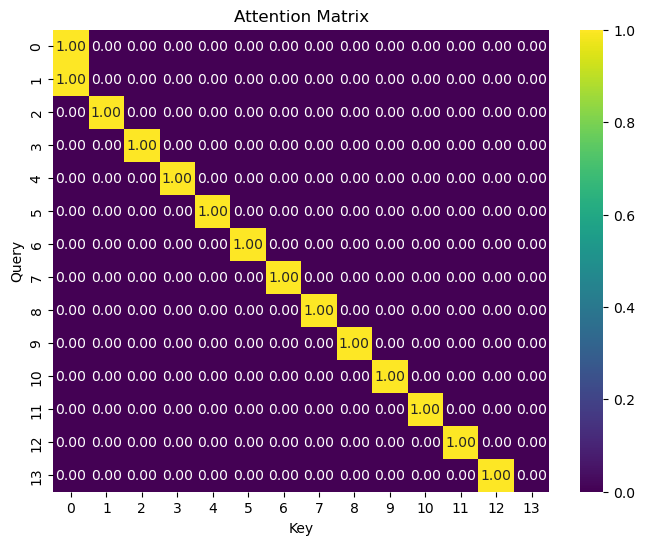

In [131]:
# plot the attention matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Att, annot=True, fmt=".2f", cmap="viridis")
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()


In [132]:
V = np.random.randn(D, D).astype(np.float32)
V.shape

(2000, 2000)

In [133]:
(X @ V)/np.linalg.norm(X @ V)@ (V@A/np.linalg.norm(V@A))

array([ 0.00203162, -0.00406829,  0.00718237, -0.00314881,  0.00533272,
       -0.00400278,  0.00557765, -0.00305031,  0.00662186, -0.00334299,
        0.0070854 , -0.00496347,  0.00738645, -0.00221265], dtype=float32)

In [134]:
(V@A).T@(V@A)

3804317.5

In [135]:
Z = (Att @ X @ V)/np.linalg.norm(Att @ X @ V)+X/np.linalg.norm(X)
Z.shape

(14, 2000)

In [136]:
Sem_A =  V.T@A/np.linalg.norm(V.T@A)
Sem_B = V.T@B/np.linalg.norm(V.T@B)
Sem_C = V.T@C/np.linalg.norm(V.T@C)

In [137]:
Sem_A.shape

(2000,)

In [138]:
#QK2 = (Sem_A.reshape(D,1)@Sem_A.reshape(1,D)) + (Sem_B.reshape(D,1)@Sem_B.reshape(1,D)) + (Sem_C.reshape(D,1)@Sem_C.reshape(1,D)) + ((A/np.linalg.norm(A)).reshape(D,1)@(A/np.linalg.norm(A)).reshape(1,D)) + ((B/np.linalg.norm(B)).reshape(D,1)@(B/np.linalg.norm(B)).reshape(1,D)) + ((C/np.linalg.norm(C)).reshape(D,1)@(C/np.linalg.norm(C)).reshape(1,D))

In [139]:
QK2 = np.identity(D)

In [152]:
Att2 = Z  @(Z.T)

In [153]:
Att2 = softmax(Att2*20, axis=1)

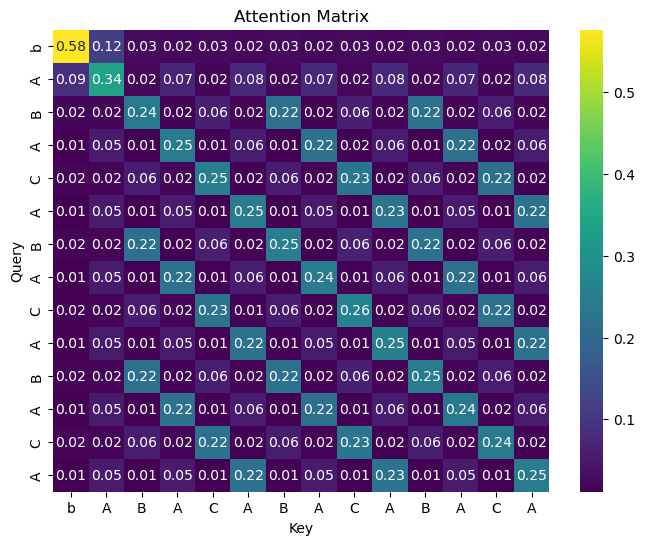

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(8, 6))
sns.heatmap(Att2, annot=True, fmt=".2f", cmap="viridis", 
            xticklabels=seq, yticklabels=seq)
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()
